In [ ]:
!pip install numpy==1.19.5
!pip install theano==1.0.5 pymc3==3.11.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 22.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: Could not build wheels for numpy, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.4/869.4 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.9 MB/s eta 0:00:00
  Preparin

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x3 = np.random.rand(100)
y3 = np.sin(3 * np.pi * (x3 + 0.8)) + 2 * x3 + 0.2 * np.random.randn(100)

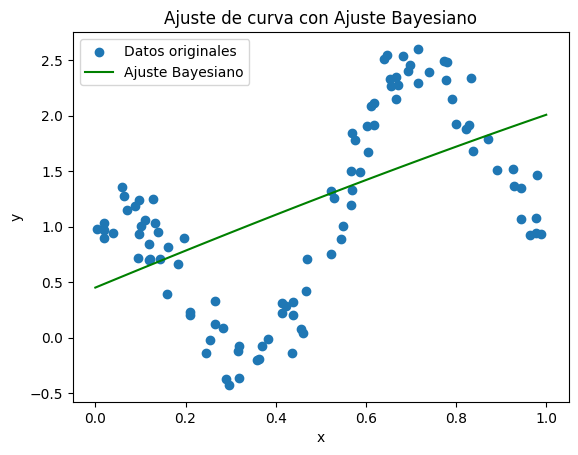

In [ ]:
import pymc as pm

with pm.Model() as modelo_bayesiano:
    # Definir las distribuciones a priori para los parámetros del modelo
    a = pm.Normal('a', mu=0, sigma=1)
    b = pm.Normal('b', mu=0, sigma=1)
    c = pm.Normal('c', mu=0, sigma=1)

    # esperanza de la distribución de y
    y_est = np.sin(a * (x3 + b)) + c * x3

    # verosimilitud de los datos observados: normalmente distribuidos alrededor de y_est
    y_obs = pm.Normal('y_obs', mu=y_est, sigma=.5, observed=y3)

    # muestreo para ajustar el modelo
    trace = pm.sample(1000, return_inferencedata=False)

a_opt_bayes = np.mean(trace['a'])
b_opt_bayes = np.mean(trace['b'])
c_opt_bayes = np.mean(trace['c'])

x_fit = np.linspace(0, 1, 100)
y_fit_bayes = np.sin(a_opt_bayes * (x_fit + b_opt_bayes)) + c_opt_bayes * x_fit

plt.scatter(x3, y3, label='Datos originales')
plt.plot(x_fit, y_fit_bayes, color='green', label='Ajuste Bayesiano')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de curva con Ajuste Bayesiano')
plt.legend()
plt.show()

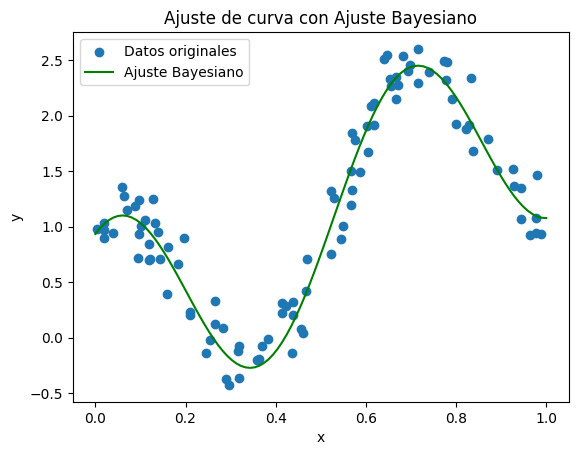

In [ ]:

# Define el modelo bayesiano
with pm.Model() as modelo_bayesiano:
    a = pm.Normal('a', mu=10, sigma=1)
    b = pm.Normal('b', mu=0, sigma=1)
    c = pm.Normal('c', mu=0, sigma=1)

    y_est = np.sin(a * (x3 + b)) + c * x3

    y_obs = pm.Normal('y_obs', mu=y_est, sigma=.5, observed=y3)

    trace = pm.sample(1000, return_inferencedata=False)

a_opt_bayes = np.mean(trace['a'])
b_opt_bayes = np.mean(trace['b'])
c_opt_bayes = np.mean(trace['c'])

x_fit = np.linspace(0, 1, 100)
y_fit_bayes = np.sin(a_opt_bayes * (x_fit + b_opt_bayes)) + c_opt_bayes * x_fit

plt.scatter(x3, y3, label='Datos originales')
plt.plot(x_fit, y_fit_bayes, color='green', label='Ajuste Bayesiano')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de curva con Ajuste Bayesiano')
plt.legend()
plt.show()

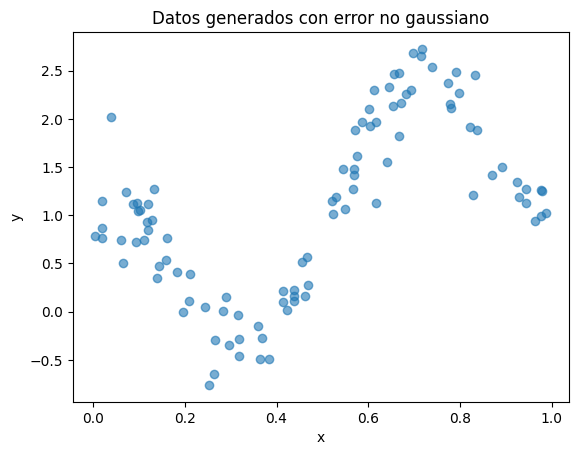

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(0)
x3 = np.random.rand(100)
# parámetros de la distribución de Student-t
df, loc, scale = 3, 0, 0.2  # Grados de libertad, media, desviación estándar

# errores desde una distribución de Student-t
errores_t = stats.t.rvs(df, loc, scale, size=x3.shape)

# generando y3 con error no gaussiano
y3 = np.sin(3 * np.pi * (x3 + 0.8)) + 2 * x3 + errores_t

plt.scatter(x3, y3, alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos generados con error no gaussiano')
plt.show()

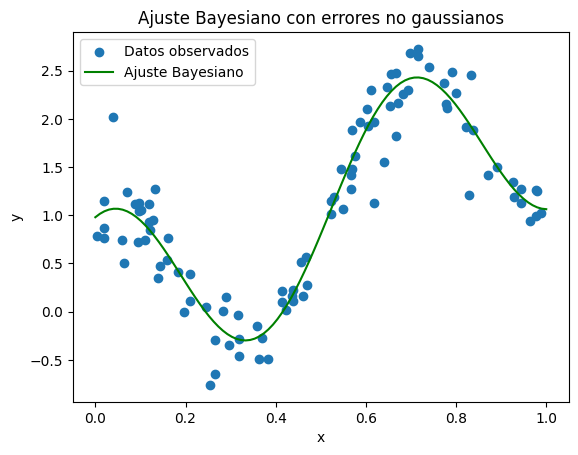

In [ ]:
import arviz as az

with pm.Model() as modelo_bayesiano:
    a = pm.Normal('a', mu=10, sigma=10)
    b = pm.Normal('b', mu=0, sigma=10)
    c = pm.Normal('c', mu=0, sigma=10)

    nu = pm.Exponential('nu', 1/30)

    y_est = np.sin(a * (x3 + b)) + c * x3

    y_obs = pm.StudentT('y_obs', nu=nu, mu=y_est, sigma=0.2, observed=y3)

    trace = pm.sample(2000, target_accept=0.95, return_inferencedata=False)

a_opt_bayes = np.mean(trace['a'])
b_opt_bayes = np.mean(trace['b'])
c_opt_bayes = np.mean(trace['c'])

x_fit = np.linspace(0, 1, 100)
y_fit_bayes = np.sin(a_opt_bayes * (x_fit + b_opt_bayes)) + c_opt_bayes * x_fit

plt.scatter(x3, y3, label='Datos observados')
plt.plot(x_fit, y_fit_bayes, color='green', label='Ajuste Bayesiano')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Bayesiano con errores no gaussianos')
plt.show()

El código realiza una inferencia bayesiana para estimar los parámetros de un modelo dado, utilizando datos que contienen errores modelados con una distribución de Student-t. Aquí se describe el proceso en términos de ecuaciones:

1. **Modelo de Datos**:

   La relación funcional entre las variables independientes \($x$\) y las observaciones \($y$\) se modela como:
   $$
   y = \sin(a \cdot (x + b)) + c \cdot x + \epsilon,
   $$
   donde:
   - \($a$\), \($b$\), y \($c$\) son los parámetros del modelo que deseamos estimar.
   - \($\epsilon$\) representa el error en las mediciones de \($y$\), asumiendo que este error sigue una distribución de Student-t.

2. **Distribuciones a Priori**:

   Se asignan distribuciones a priori para cada uno de los parámetros del modelo:
   $$
   a \sim \text{Normal}(\mu=0, \sigma=10),
   $$
   $$
   b \sim \text{Normal}(\mu=0, \sigma=10),
   $$
   $$
   c \sim \text{Normal}(\mu=0, \sigma=10),
   $$
   $$
   \nu \sim \text{Exponencial}(\lambda=\frac{1}{30}),
   $$
   donde \($\nu$\) es el parámetro de grados de libertad de la distribución de Student-t que modela el error \($\epsilon$\).

3. **Función de Verosimilitud**:

   La verosimilitud de las observaciones \($y$\) dadas las variables independientes \($x$\) y los parámetros del modelo se modela con una distribución de Student-t:
   $$
   y_{\text{obs}} \sim \text{StudentT}(\nu, \mu=y_{\text{est}}, \sigma=0.2),
   $$
   donde \($y_{\text{est}} = \sin(a \cdot (x + b)) + c \cdot x$\) es la estimación del modelo para las observaciones \($y$\).

4. **Inferencia Bayesiana**:

   La inferencia Bayesiana se logra conocida la previa y la verosimilitud. La evidencia no es relevante si no se va a hacer una comparación de modelos. Sencillamente importa el producto de la previa y la verosimilitud que da algo proporcional a la función posterior. Con técnicas de muestreo, se pueden obtener realizaciones de la posterior incluyendo las incertidumbres en cada uno de los parámetros. Finalmente esa posterior se puede usar para obtener estimadores de cada uno de los parámetros.
   Utilizando los datos observados, las distribuciones a priori, y la función de verosimilitud, se emplea el muestreo (por ejemplo, el algoritmo NUTS) para generar distribuciones a posteriori para los parámetros \($a$\), \($b$\), \($c$\), y \($\nu$\).

5. **Estimación de Parámetros**:

   Los valores estimados para los parámetros \($a$\), \($b$\), y \($c$\) se obtienen como las medias (o medianas) de sus respectivas distribuciones a posteriori.

Este proceso refleja un enfoque bayesiano para la estimación de parámetros, que permite incorporar conocimiento previo (a través de las distribuciones a priori), modelar explícitamente la incertidumbre en las observaciones (a través de la función de verosimilitud), y obtener una comprensión completa de la incertidumbre en las estimaciones de los parámetros (a través de las distribuciones a posteriori).

El paso `trace = pm.sample(2000, target_accept=0.95, return_inferencedata=False)` en PyMC3 inicia el proceso de muestreo para realizar la inferencia bayesiana. Este proceso se basa en Métodos de Monte Carlo por Cadenas de Markov (MCMC), específicamente utilizando algoritmos avanzados como el No-U-Turn Sampler (NUTS), una variante adaptativa del Hamiltonian Monte Carlo (HMC). Aquí explicamos el proceso subyacente y cómo se relacionan las opciones especificadas en el código con las ecuaciones y conceptos matemáticos fundamentales.

### Muestreo MCMC y NUTS

1. **Muestreo MCMC**

   El objetivo del muestreo MCMC es generar una secuencia de muestras \($\theta_1, \theta_2, \ldots, \theta_n$\) de la distribución a posteriori $P(\theta | D)$, donde \(\theta\) representa los parámetros del modelo y \(D\) los datos observados. El principio básico se puede expresar como:

   $$
   \theta_{i+1} = \theta_i + \epsilon_i \cdot \Delta,
   $$

   donde \($\epsilon_i$\) es un paso aleatorio y \($\Delta$\) es la dirección del paso, generalmente determinada por el gradiente de la log-verosimilitud de los datos dado el parámetro actual \($\theta_i$\).

2. **Hamiltonian Monte Carlo (HMC)**

   HMC mejora la eficiencia del muestreo utilizando mecánica hamiltoniana para proponer saltos en el espacio de parámetros. La idea es simular la trayectoria de una partícula en un "paisaje energético" definido por la log-verosimilitud negativa. Se calcula una trayectoria que típicamente propone muestras lejanas de la posición actual pero con alta probabilidad a posteriori.

3. **No-U-Turn Sampler (NUTS)**

   NUTS es una extensión de HMC que elimina la necesidad de especificar un número fijo de pasos de simulación. NUTS utiliza un criterio para detener automáticamente la simulación cuando la trayectoria comienza a "doblarse" sobre sí misma, lo cual ayuda a prevenir la toma de muestras ineficiente y asegura una exploración adecuada del espacio de parámetros.

### Parámetros de `pm.sample`

- **Número de muestras (2000)**: Especifica el número de muestras a generar desde la distribución a posteriori. Más muestras pueden mejorar la aproximación de la distribución a posteriori, pero a costa de un mayor tiempo de computación.

- **`target_accept=0.95`**: Este parámetro ajusta la tasa de aceptación objetivo para el algoritmo NUTS. Una tasa de aceptación más alta puede mejorar la calidad de las muestras pero puede requerir pasos más pequeños y, por tanto, más iteraciones para explorar el espacio de parámetros adecuadamente.

- **`return_inferencedata=False`**: Determina el formato de los resultados del muestreo. `False` indica que el resultado debe ser un objeto `MultiTrace` tradicional de PyMC3.

### Resumen

El proceso de muestreo MCMC, específicamente mediante NUTS en esta instancia, genera muestras de la distribución a posteriori de los parámetros del modelo dados los datos observados. Estas muestras permiten la estimación de estadísticas posterioris (como medias, medianas, e intervalos de credibilidad) de los parámetros del modelo, ofreciendo una visión completa de la incertidumbre asociada a las estimaciones de los parámetros después de haber observado los datos.